In [2]:
%matplotlib inline
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Focus questions

Goals for student knowledge at the end of the lesson:

1. Give examples of situations where the following distributions are an appropriate model for observed data:
    - Poission
    - Weibull
    - log-normal
2. Describe a situation where the central limit theorem can be applied to use statistics based on normal distributions, when population being sampled is non-normal.

## Review

#### Measurement types
- Ordinal: Hurricane scale
- Nominal: species classification
- Scale
  - Interval: Zero point is arbitrarily defined
  - Ratio: Variables with a natural zero point, Kelvin scale, length, mass

#### Error types

-Accuracy
    -closenes to a known value
    -close to other values (repeatability)
    
- Measurement Errors
  - Systematic - Instrument Drift, bias
  - Random - noise
  - previous computation
  - modeling errors
  
- Computational errors:
     - Numerical errors: Approximations with limited computational resources
     - Round-off, truncation
     - Data errors: garbage in - garbage out
     - Errors from previous computations
     - Modeling errors



## Probability Density functions

__Probability Functions__

$P(x)$ = probability mass function (for discrete data)

_Example:_ The probability an number $x$ coming up on a dice role. The PMF is plotted as vertical lines because the probability of rolling a non-integer (e.g. 3.5) is equal to zero.
 

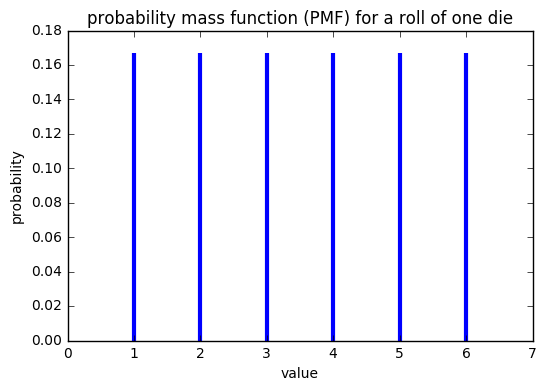

In [3]:
# generate a uniform distribution
# see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html#scipy.stats.randint
low = 1
high = 7
rv = stats.randint(low, high)

# plot the probability mass function
x = np.arange(low,high)
plt.vlines(x, 0, rv.pmf(x), colors='b', linestyles='-', lw=3)
plt.xlim(0,7)
plt.title('probability mass function (PMF) for a roll of one die')
plt.xlabel('value')
plt.ylabel('probability')

$F(x)$ = cumulative distribution function

The cumulative distribution is the probability of occurrence of a value of $x$ or lower. For the example of one die roll, the CDF is a step function.

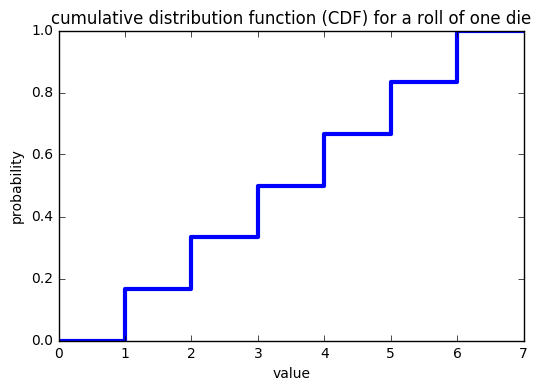

In [4]:
# make a step function from points, function adapted from http://stackoverflow.com/a/41185239
def get_x_y_steps(x, y, where="post"):
    zipxx = list(zip(x, x))
    zipyy = list(zip(y, y))
    if where == "post":
        x_step = [x[0]] + [_x for tup in zipxx[1:] for _x in tup]
        y_step = [_y for tup in zipyy[:-1] for _y in tup] + [y[-1]]
    elif where == "pre":
        x_step = [_x for tup in zipxx[:-1] for _x in tup] + [x[-1]]
        y_step = [y[0]] + [_y for tup in zipyy[1:] for _y in tup]
    return x_step, y_step

# create step function for CDF
xcdf = np.hstack([0,x,x[-1]+1])
ycdf = np.hstack([0,rv.cdf(x),1])
(x_step,y_step) = get_x_y_steps(xcdf,ycdf)

# plot CDF
plt.plot(x_step, y_step,lw=3)
plt.xlim(0,7)
plt.ylim(0,1)
plt.title('cumulative distribution function (CDF) for a roll of one die')
plt.xlabel('value')
plt.ylabel('probability')

__Mutiplication Principle__ - If two events $A$ and $B$ are unrelated, the probability of joint occurrence $P(A,B)$, i.e. both events happening, is multiplication of two probabilities,

$P(A,B)  = p(B)p(A)$.

This is a simplification of __Bayes' theorem__ for the special case where events are independent. In the more general case where the probability of events are not independent, 

$P(A,B) = p(B|A)p(A) = p(A|B)p(B)$,

where $p(A|B)$ is the probability of $A$ occuring, given that $B$ has already occurred. In this case, the two events depend on each other, which is not the case for dice.

__Additive principle__ - Probability of one event or another mutually exclusive event is the sum of the probabilities. Mutually exclusive means that the events cannot occur at the same time.

$P(C|D) = P(C) + P(D)$

### Sum of two dice

From the rules above, we can calculate the probability mass function and cumulative distribution function for the sum of two dice. From the multiplcation rule, the probability of rolling a particular sequence of dice is (1/6) $\times$ (1/6) = 1/36. This is the probability of a joint occurrence of two independent events. For example, the combinations (1 and 1), (1 and 2), (2 and 1) and (1 and 3) are all joint occurrences of two independent events.

The probability of obtaining a certain sum, which may be arrived at through several possible sequences of dice rolls, can be calculated from the addition rule. There are three ways of obtaining a sum of four: (1 and 3) or (2 and 2) or (3 and 1). These combinations of rolls are mutually exlusive. Therefore the probability of rolling a four is (1/36) + (1/36) + (1/36) = 1/12.

__Exercises__:

* Graph the probability mass function and cumulative distribution function for the sum of two dice.

* Roll actual dice and calculate the sum of two dice from multiple trials. Plot the observed probability mass function from this limited set of trials. Compare the observed distribution with the theoretical distribution derived from probability theory above and discuss.

## Distributions

### Normal Distribution

<img src="images/norm_dist_rule.png" width="450">
[Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#/media/File:Empirical_Rule.PNG)


* __Mean__ - 1st moment
* __Variance__ - 2nd moment
* __Skew__ - 3rd moment, Describes the spread (Normal Distribution, skew = 0)
* __Kurtosis__ - 4th moment, Describes how pointy the distribution is. Low value would be flat (compared to a Normal distribution (k=3))

### Non-normal distribution 
__Example: Life expectancy__<br>

Negative skew towards later life (spike at birth). The cumulative probability function is useful because we are not necessarily interested in the probability of dying at a very specific age, like exactly 67 years. We are more interested in the probability of living until a certain age or less. The cumulative probability distribution tapers off to one for very high ages. The probability of living to 120 years or less is equal to one.

<div style="float: left;" width ="1000">
    <img src="images/life_expectancy_1.png" style="float: left;" width="50%"><img src="images/life_expectancy_2.png" width="50%" style="float: right;">
</div>
source: http://www.cureffi.org/2013/06/19/how-censoring-by-life-expectancy-affects-age-of-onset-distributions/


### Poisson Distribution
  * Often used as a model for count data
  * Assumptions:
    * One event does not affect the probability of the next (they are independent)
    * Events cannot occur in the same time and place in the interval
    * Events occur at a constant rate<br>

    $k$ = # of events counted per interval (ie floods per century)<br>
    $\lambda$ = expected values, true mean
    
     $P(k$ events per interval$)$ = $\frac{\lambda e^{-\lambda}}{k!} $

    Count uncertainty  = $\sqrt{k}$ - More counts => less uncertainty

__example__: if on average 10 flood occur per century. What is probability of counting 15 floods occuring in a centry?

Probability of 15 floods in a century: 0.03475408547625957


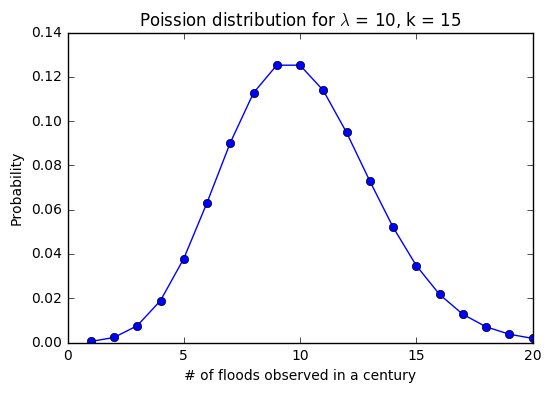

In [12]:
# Poisson Distribution

e = 2.718 #Eulers number approximation
k = 15 # number floods in a century that we we want to estumate
lam = 10 # The mean number of floods in a century counted
prob_15 = (10**15 * e**(-1*lam)) / math.factorial(k)
print("Probability of 15 floods in a century:",prob_15)

# Modeling
x = np.arange(1,21) # A range of possible floods
vec_fac = np.vectorize(math.factorial) # function doesn't natively accept numpy arrays
p = (10.0**x * e**(-lam)) / vec_fac(x)

# Plotting the model
fig, ax = plt.subplots()
ax.plot(x,p,marker='o')
ax.set_xlim(0,20)
ax.set_ylabel('Probability')
ax.set_xlabel('# of floods observed in a century')
plt.title('Poission distribution for $\lambda$ = 10, k = 15')

### Weibull Distribution 

A theoretical distribution that is often fit to wind speed data. Wind speed has only positive values, so the probability of a negative wind speed is zero. The distribution of wind speed is generally skewed, since very high values do occur, but are rare. This theoretical distribution is useful for engineering wind power projects, since it can be defined by a few parameters. The parameters obtained from a fit to data at a given location can be used as inputs to models for designing equipment with maximum efficiency.

<img src="images/weibull.png" width="500" align='center'>
Source: http://www.wind-powemr-program.com/wind_statistics.htm


### Log-Normal Distribution 

Many biological data, such as growth rates, follow a log-normal distribution. The distributions are skewed, with a peak close to zero but a long tail of rare high values. These data can be transformed by taking the logarithm, giving a distribution that is more symmetric and closer to a normal distribution.

<img src="images/log_normal.png" width="600" align='center'>
source: Landry, M.R. and B.M. Hickey (eds.) (1989) Coastal Oceanography of Washington and
Oregon, 607 pp., Elsevier Science, Amsterdam, The Netherlands.

### Back to Normal Distributions

Random instrument error is often normally distributed. The mean of errors tends to be zero if error is randomly distributed and _accurate_, i.e. not biased.

<img src='images/instr_error_dist.png' width='500'>
source: T. Connolly

In this example, error is defined as: $T_{sat} - T_{mooring}$ units of [$^o$C]. There is a fairly large spread in the data. We therefore cannot be extremely confident in any particular satellite image. However, we can be confident that the mean of a large number of errors is close to zero.

Normal distributions can be "standardized", where the
* mean = 0
* standard deviation = 1
* Unitless

The __z-score__ transforms the data so that each data point is unitless and described in terms of standard deviations away from the mean.

## $ z_i = \frac{x_i - \bar{x}}{ s } $ ##

The z-score can be helpful for identifying outliers (large Z-scores). Outliers are often classified as having a z-score of $\pm$ 3. However, the basic rules of scientific integrity require that you have a good reason for excluding outliers from your analysis, and report that they have been excluded. Never delete outliers from the original data set.

### Describing Uncertainty of Mean Values
- Random instruemtn error is often normally distributed
- We have better confidence in the mean than any one value
- We need to be able to quantify our uncertainty in our estimate of the mean.


### Student's $t$ distribution:

If samples come from a parent population that is normally distributed with true mean $\mu$, the $t$ statistic of a group of random samples can be defined as 

## $ t = \frac{\bar{x} - \mu} { \frac{s}{\sqrt{N}}}$ ##

where $N$ is the number of samples. The probability distribution of this $t$ statistic (i.e. from multiple groups of random samples) forms a $t$ distribution. The denominator in this equation is equal to the standard error. The shape of the $t$ distribution depends on the degrees of freedom $\nu = N -1$. The t distribution generally has less kurtosis than the normal distribution

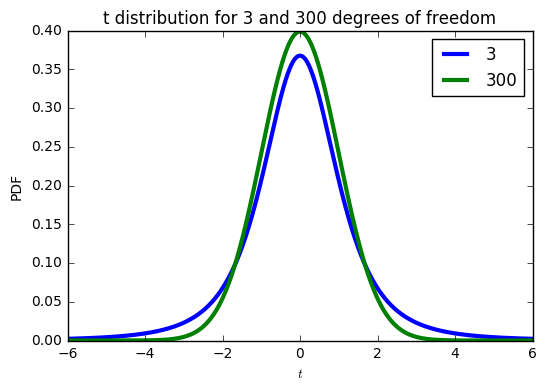

In [6]:
x = np.arange(-6,6,0.001)
plt.figure()
plt.plot(x,stats.t.pdf(x,3),lw=3)
plt.plot(x,stats.t.pdf(x,300),lw=3)
plt.legend(['3','300'])
plt.xlabel('$t$')
plt.ylabel('PDF')
plt.title('t distribution for 3 and 300 degrees of freedom')

The t distribution has a narrower distribution for many degrees of freedom. This is because with more samples, the sample mean gets closer to the true mean. There will be less spread in $\bar{x}-\mu$, and therefore also less spread in the value of $t$.

We can define $t_{1-\alpha, \nu}$ as the value of $t$ where a fraction $1-\alpha$ of the entire distribution is less than $t_{1-\alpha, \nu}$. Again, $\nu$ represents the degrees of freedom $N-1$ and determines the shape of the distribution. For $\alpha$ = 0.025, 95% of the distribution falls between $t_{0.975,\nu}$ and -$t_{0.975,\nu}$.


#### Confidence intervals for the mean

If many groups of $N$ samples are taken from the same normally distributed parent population, a fraction 1-$\alpha$ of the sample means will fall in within the confidence intervals

$ \bar{x} - t_{1-\alpha/2} \frac{S} {\sqrt{N}} < \mu <  \bar{x} + t_{1-\alpha/2} {\frac{S} {\sqrt{N}}} $.

For a given group of $N$ samples and $\alpha$ = 0.05, this interval means that there is a 95% chance that the true mean falls within these values, assuming that the parent population is normally distributed.

This interval does _not_ describe the spread of the data, or where 95% of the samples fall. The spread is determined by the standard deviation. 

For $\alpha$ = 0.05, these values represent the 95% confidence intervals. The use of 95% confidence intervals is common, but there is no reason that this should necessarily be a cut-off. We can never be 100% certain that the true mean falls within a certain interval, but we want to be pretty certain.

#### Exercise

You are calibrating a nitrate sensor with bottle samples. The sensor has less accuracy than the bottle samples, but you are only able to collect a handful of discrete samples. You obtain differences $\Delta$NO$_3^-$ of 3.25, 0.43, -0.17 and 3.89 $\mu$M. Calculate the sample mean, and the 95% confidence intervals for the mean, assuming that the instrument error is normally distributed.

### Confidence intervals for variance
Describes the how well you know the true variance.

Calculating the confidence intervals for variance:

$ \frac{(N -1) s^2}{\chi^2 _{1-\alpha/2}} < \sigma^2 <  \frac{(N -1) s^2}{\chi^2 _{\alpha/2}} $ 

In this equation, the larger $\chi^2 _{1-\alpha/2}$ value is in the denominator of the lower bound.

Note that the $\chi^2$ values are not symmetric

$ \chi^2_{\alpha/2} \ne \chi^2_{1-\alpha/2} $

In addition, both $\chi^2$ values are both greater than zero. This ensures that both the upper and lower limits of the confidence intervals for variance (and standard deviation) are always greater than zero.

#### Exercise

Calculate the 95% confidence intervals for the standard deviation of the nitrate errors given above.

### The Central Limit Theorem

The __central limit theorem__ states that no matter what the probability distribution of parent population is, the _mean of the means_ drawn from the same population is normally distributed for large sample sizes. As $N$ approaches infinity,

mean$(\bar{x}) \rightarrow \mu$ (the mean of the sample means approaches the true mean)

std$(\bar{x}) \rightarrow \frac{\sigma}{\sqrt{N}}$ (the standard deviation of the sample means approaches the true standard error)

The important consequence of this theorem is that if you collect enough samples, the sample mean will always provide an unbiased estimate of the true mean and you can calculate confidence intervals with the formulas above.

However, if you have too few samples, the sample mean will provide a _biased_ estimate.

Some examples of situation where the central limit theorem is applied:

* Radiochemists study discrete decay events, which follow a Poisson distribution. A few samples will give a biased estimate of the mean rate of radioactive decay. If enough samples are collected, the sample mean and 95% confidence intervals can be calculated using the formulas described above.


* Physical oceanographers routinely take advantage of the central limit theorem when using observations of pressure or velocity measurements to study processes with time scales much longer than individual waves. The probability distribution of a wavy sea surface is not normal at all, but by collecting many samples (a.k.a. and ensemble) over a period of ~10-20 minutes we can effectively "average out" the waves and be confident in the mean of that ensemble. 

When sampling a noisy environment and ensemble averaging, oceanographers must be careful to choose an ensemble that is long enough to collect enough samples, but not so long that the statistics are changing significantly over longer time scales. If statistics are robust regardless, of the sampling duration, the process is said to be __stationary__. 